In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

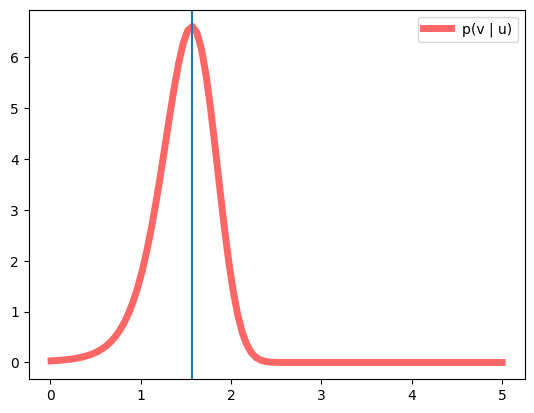

In [2]:
# Exercise 1 - Perform exact bayesian inferenece given a model of sensory input to infer the size of a food object, input = u and our model states 

observed_light_intensity = 2
receptor_varience = 1

prior_mean      = 3
prior_varience  = 1

sizes           = np.linspace(0.01, 5, 100)

prior_dist = norm.pdf(sizes, loc=prior_mean, scale=1)
likelihood = norm.pdf(observed_light_intensity, loc=sizes**2, scale=receptor_varience)

numerator = prior_dist * likelihood
marginal_likelihood = sum(numerator * 0.01)


plt.plot(sizes, numerator / marginal_likelihood,'r-', lw=5, alpha=0.6, label='p(v | u)')
plt.legend()
# plt.axvline(np.sqrt(observed_light_intensity))
plt.axvline(1.5674704715568213)
plt.show()

In [3]:
# Exercise 2 - Perform bayesian inferenece based on maximising the negative free energy

observed_light_intensity = 2
receptor_varience = 1

prior_mean      = 3
prior_varience  = 1

phi = prior_mean
step_size = 0.01

for _ in range(100):
    partial_F = (prior_mean - phi) / np.sqrt(prior_varience) + ((observed_light_intensity - phi ** 2) / np.sqrt(prior_varience)) * 2 * phi
    phi = phi + step_size * partial_F
print(phi)

1.5674704715568213


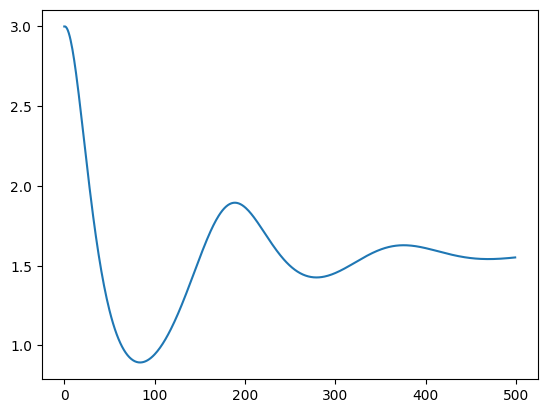

In [14]:
# Exercise 3

v_p     = 3
sigma_p = 1
sigma_u = 1

u       = 2

dt          = 0.01
max_time    = 5
iterations  = int(max_time / dt)

phi         = np.zeros((iterations))
error_p     = np.zeros((iterations))
error_u     = np.zeros((iterations))

phi[0]    = v_p
error_p[0]  = 0 
error_u[0]  = 0

for i in range(1, iterations):

    phi[i]      = phi[i - 1] + dt * ( error_u[i - 1] * 2 * phi[i - 1] - error_p[i - 1] )
    error_u[i]  = error_u[i - 1] + dt * ( u - phi[i-1]**2 - sigma_u * error_u[i - 1] )
    error_p[i]  = error_p[i - 1] + dt * ( phi[i - 1] - v_p - sigma_p * error_p[i - 1] )


plt.plot(phi)
plt.show()

In [ ]:
# Exercise 4